In [30]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
import pickle 
import json 

month = "03"
env_name = "spot_micro"
font = {'size'   : 18}

matplotlib.rc('font', **font)
colors =  ['#332288', '#117733', '#44AA99',
           '#88CCEE', '#DDCC77', '#CC6677',
           '#AA4499', '#882255', '#0A0A0A']*10

In [26]:
ub = 1
lb = -ub
max_vel, max_acc, max_jerk = 10, 100, 10000
dt = 0.02
res = []
for degree in [0,1,2,3]:
    past = np.array([[0]*12]*3)
    for i in range(3, 500+3):
        if degree == 0:
            amax = [ub]*12
            amin = [lb]*12
        elif degree == 1:
            amax = past[i - 1] + max_vel * dt
            amin = past[i - 1] - max_vel * dt
            amax, amin = np.clip(amax, lb, ub), np.clip(amin, lb, ub)
        elif degree == 2:
            amax = np.min((past[i - 1] + max_vel * dt,
                           2 * past[i - 1] - past[i - 2] + max_acc * dt ** 2),
                          axis=0)
            amin = np.max((past[i - 1] - max_vel * dt,
                           2 * past[i - 1] - past[i - 2] - max_acc * dt ** 2),
                          axis=0)
            amax, amin = np.clip(amax, lb, ub), np.clip(amin, lb, ub)
        else:
            amax = np.min((past[i - 1] + max_vel * dt,
                           2 * past[i - 1] - past[i - 2] + max_acc * dt ** 2,
                           3 * past[i - 1] - 3 * past[i - 2] + past[i - 3] + max_jerk * dt ** 3),
                          axis=0)
            amin = np.max((past[i - 1] - max_vel * dt,
                           2 * past[i - 1] - past[i - 2] - max_acc * dt ** 2,
                           3 * past[i - 1] - 3 * past[i - 2] + past[i - 3] - max_jerk * dt ** 3),
                          axis=0)
            amax, amin = np.clip(amax, lb, ub), np.clip(amin, lb, ub)
        x = np.random.uniform(amin, amax)
        past = np.append(past, [np.copy(x)], axis=0)
    res.append(np.copy(past))

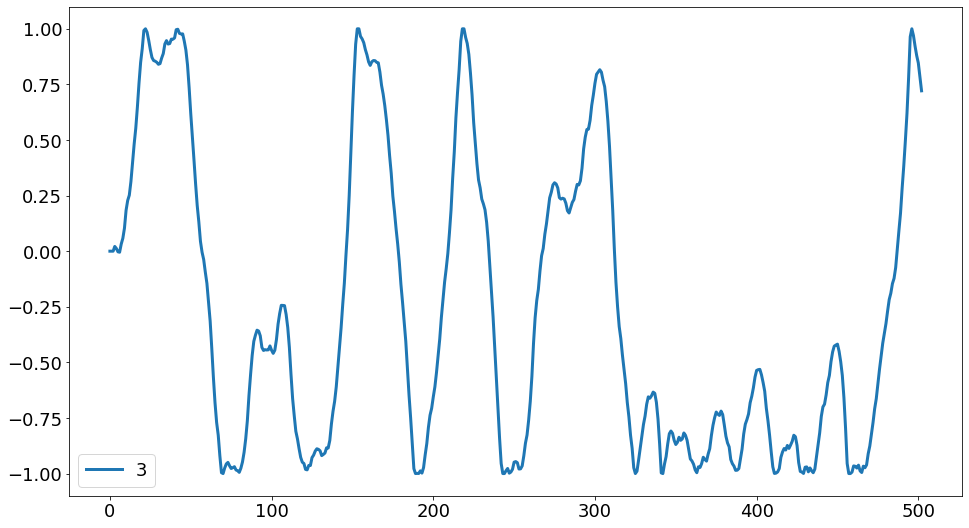

In [37]:
plt.subplots(figsize=(16,9))
for degree in [3]:
    plt.plot(res[degree][:, 0], label=str(degree), lw=3)
plt.legend()

In [33]:
def plot_action(subsirs, names, T1=0, T2=500, ep=-1, J=[0]):
    path = "../exp/results/"+env_name+"_"+month+"/"
    file = "/run_0/logs.pk"
    cf_file = "/run_0/config.json"
    Acs, dt = [], []
    for directory in subdirs:
        with open(path+directory+file, "rb") as f:
            data = pickle.load(f)
        with open(path+directory+cf_file, "r") as f:
            config = json.load(f)
        acs = data['actions'][0]
        Acs.append(acs)
        dt.append(config['ctrl_time_step'])
    fig, ax = plt.subplots(len(J), figsize=(16,9))
    if len(J) == 1:
        ax = [ax]
    for j in range(len(J)):
        for i in range(len(Acs)):
            Y = Acs[i][ep][T1:T2, J[j]]
            X = [dt[i]*j for j in range(len(Y))]
            ax[j].plot(X, Y, lw=1, label=names[i], color=colors[i])
            ax[j].scatter(X, Y, lw=1, color=colors[i])
            ax[j].set_xlabel("time (s)")
            ax[j].set_ylabel(["Abduction", "Swing", "Extension"][J[j]%3])
    ax[-1].legend()

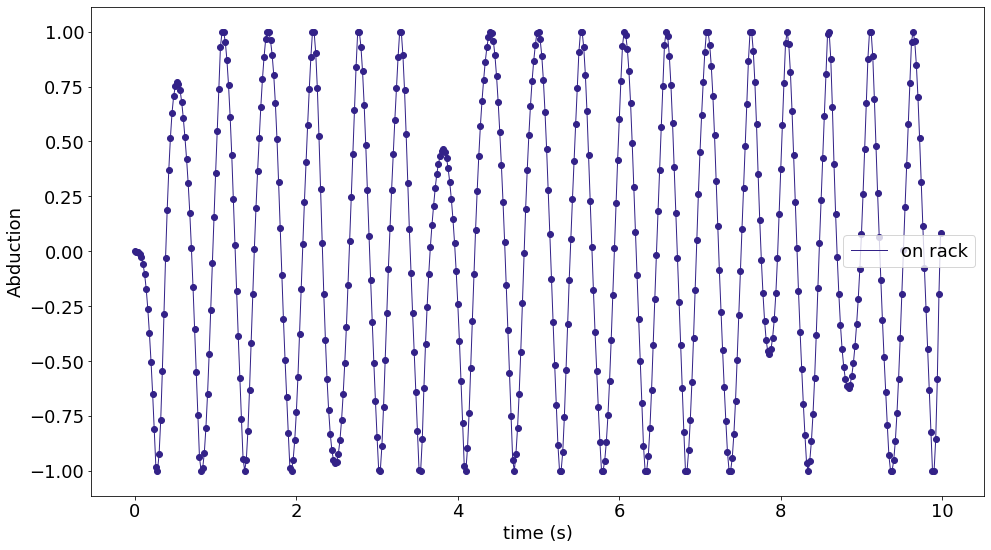

In [39]:
observe_sampled_action = "05_03_2020_14_41_47_experiment"

subdirs = [observe_sampled_action]
names = ['on rack']

plot_action(subdirs, names, ep=0)

In [55]:
with open("./data/Working_traj.pk", 'rb') as f:
    traj = pickle.load(f)

In [67]:
np.min(traj[25:100], axis=0)

array([-0.02631636, -0.99003947,  1.16193786, -0.03252542, -0.97907863,
        1.19505642, -0.0839304 , -1.14127554,  1.06825771, -0.08471694,
       -1.17009374,  1.02659106])

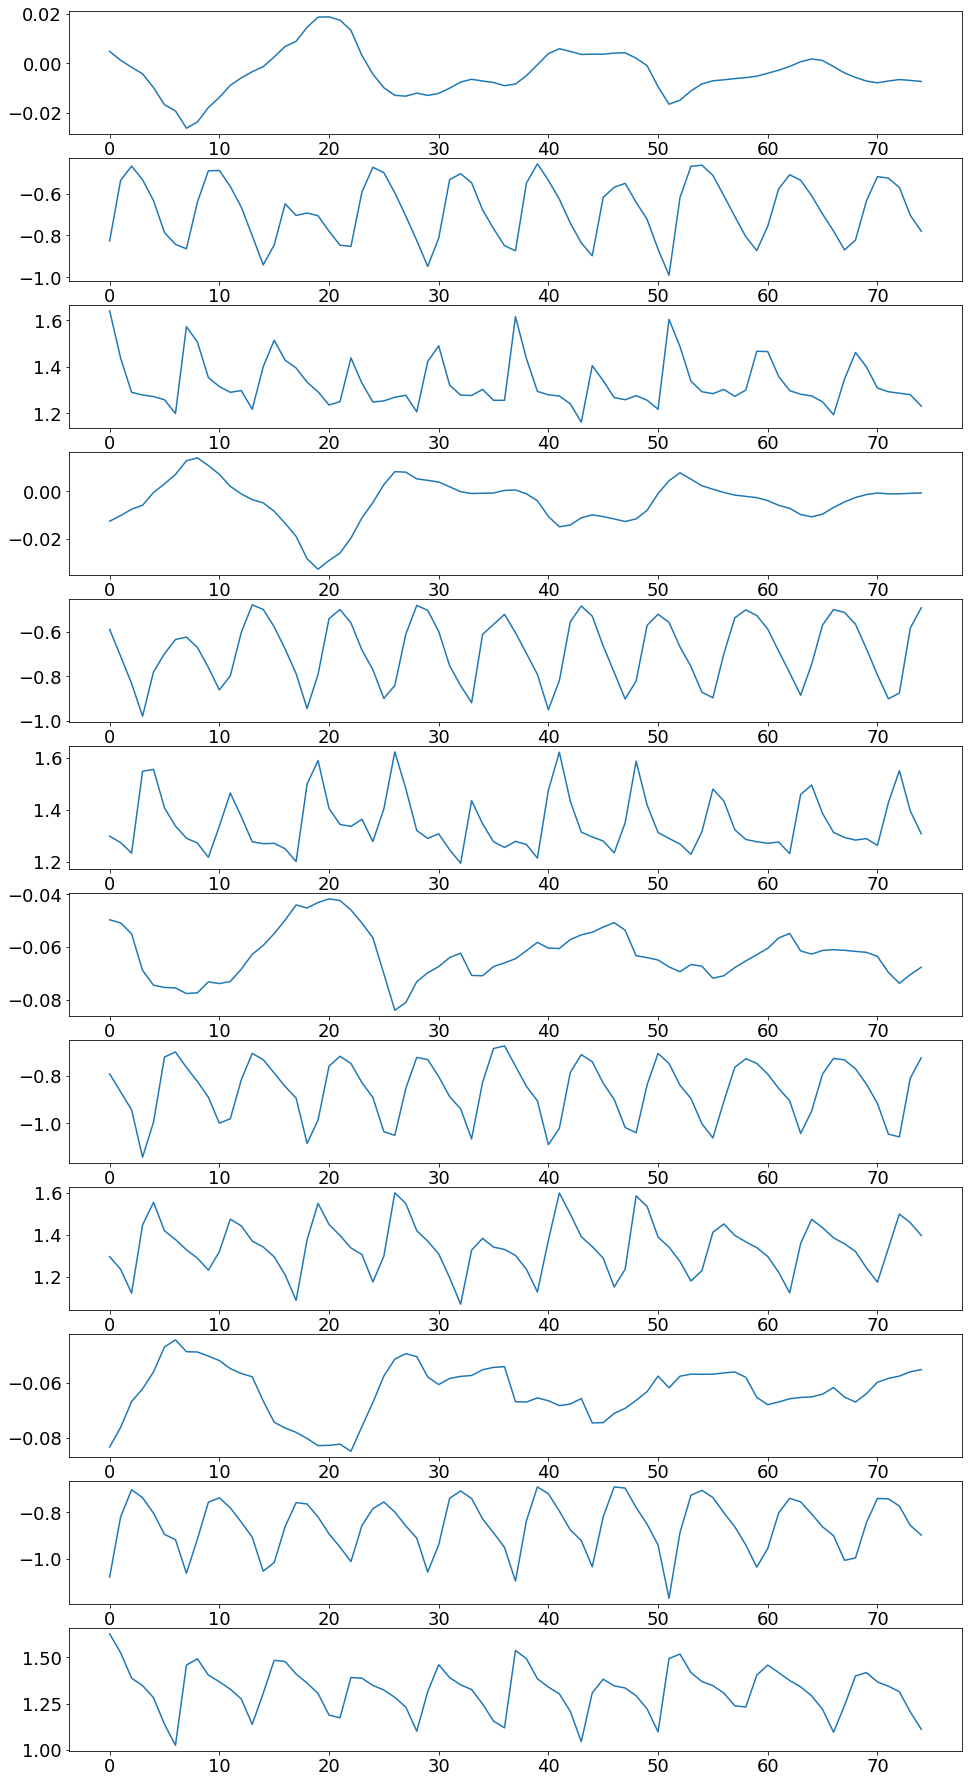

In [60]:
fig, ax = plt.subplots(12, figsize=(16,32))
for i in range(12):
    ax[i].plot(traj[25:100, i])